In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['train_labels.csv', 'train_images.npy', 'test_images.npy', 'sample_submission.csv']


In [62]:
#Load images with numpy
images = np.load('input/train_images.npy', encoding='latin1')
images.shape

(10000, 2)

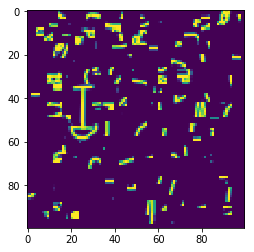

[0. 0. 0. 0.]
25 60 10 45


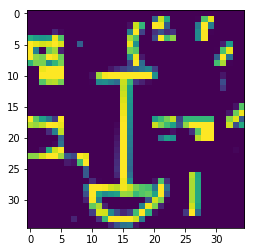

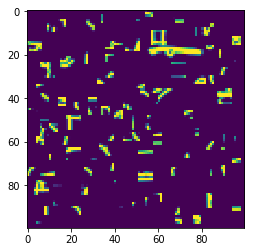

[0. 0. 0. 0.]
5 40 55 90


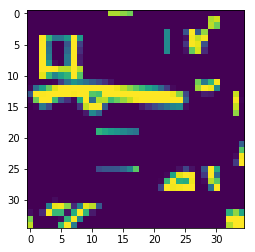

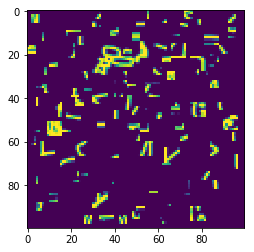

[0. 0. 0. 0.]
10 45 20 55


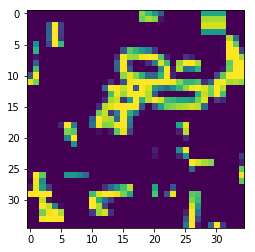

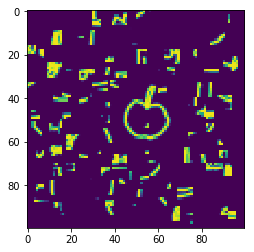

[0. 0. 0. 0.]
90 125 90 125


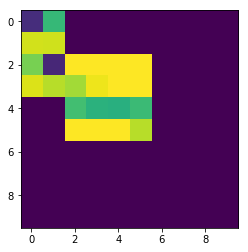

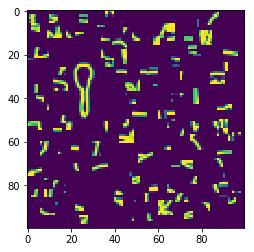

[0. 0. 0. 0.]
80 115 40 75


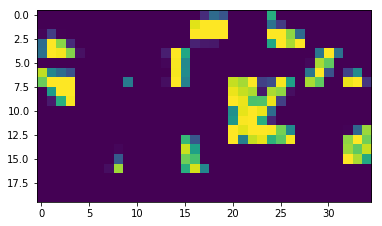

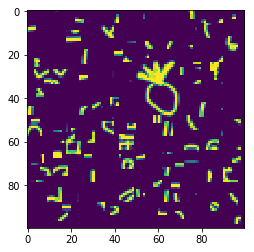

[0. 0. 0. 0.]
95 130 95 130


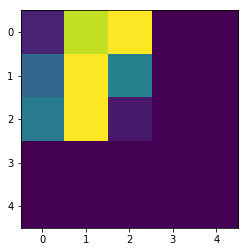

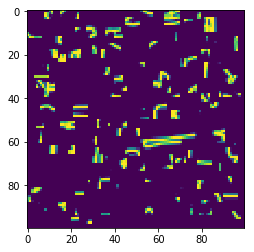

[0. 0. 0. 0.]
40 75 40 75


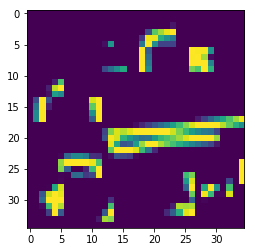

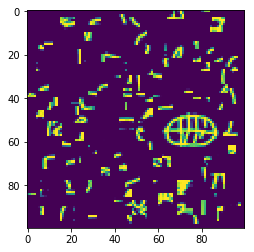

[0. 0. 0. 0.]
50 85 60 95


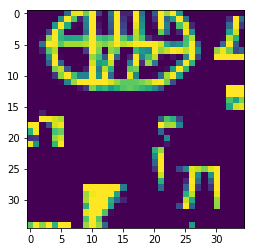

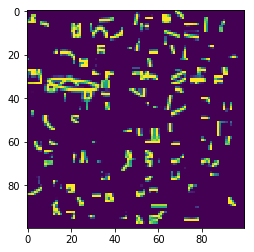

[0. 0. 0. 0.]
5 40 5 40


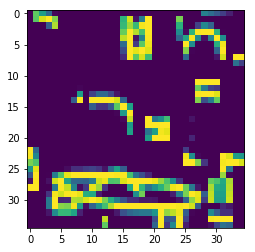

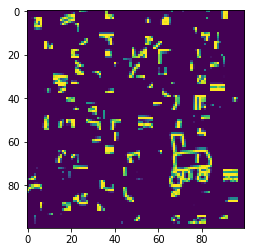

[0. 0. 0. 0.]
55 90 65 100


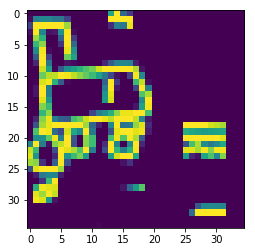

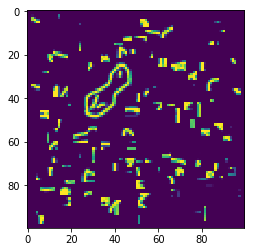

[0. 0. 0. 0.]
15 50 25 60


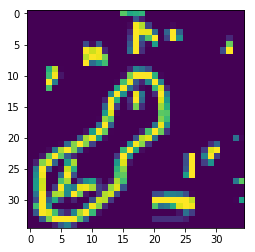

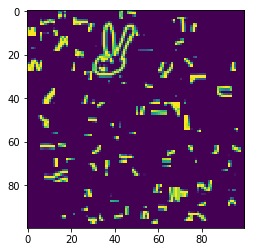

[0. 0. 0. 0.]
5 40 10 45


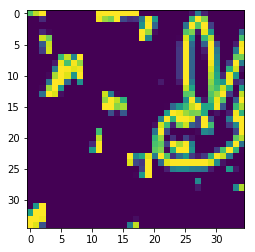

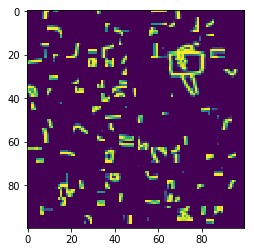

[0. 0. 0. 0.]
90 125 70 105


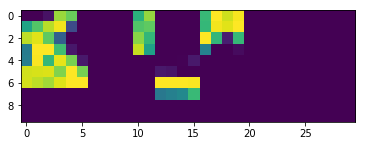

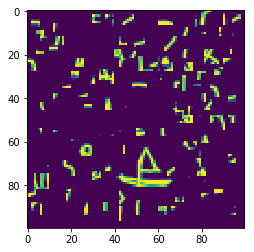

[0. 0. 0. 0.]
70 105 35 70


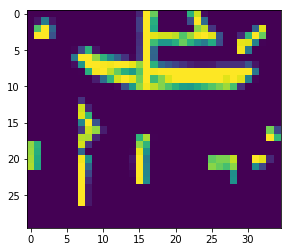

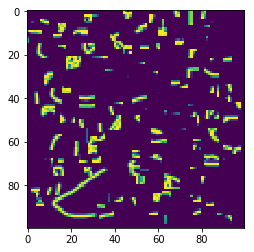

[0. 0. 0. 0.]
40 75 10 45


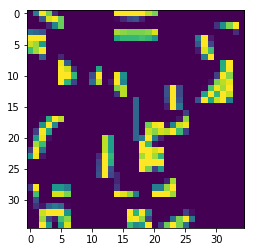

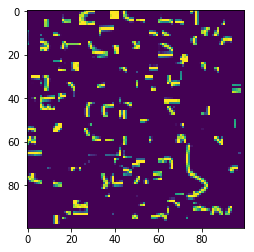

[0. 0. 0. 0.]
90 125 85 120


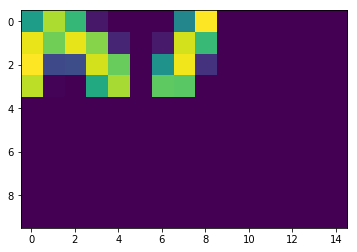

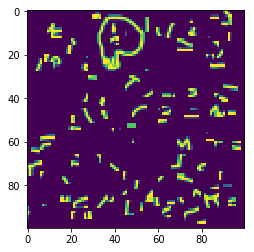

[0. 0. 0. 0.]
85 120 55 90


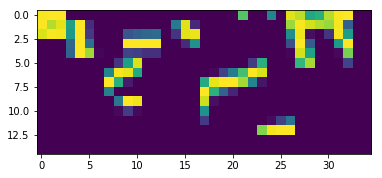

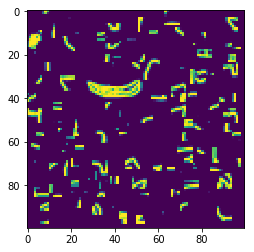

[0. 0. 0. 0.]
20 55 90 125


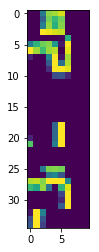

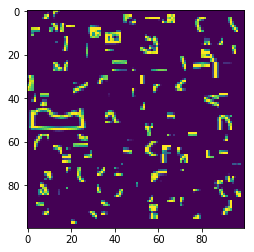

[0. 0. 0. 0.]
45 80 5 40


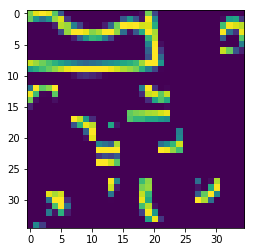

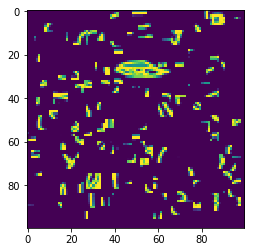

[0. 0. 0. 0.]
20 55 35 70


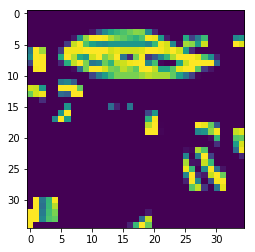

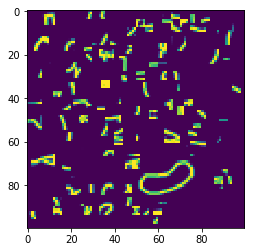

[0. 0. 0. 0.]
55 90 35 70


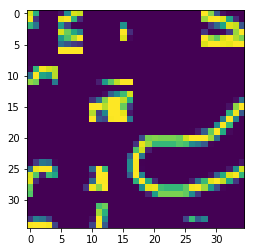

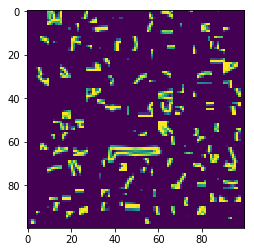

[0. 0. 0. 0.]
40 75 35 70


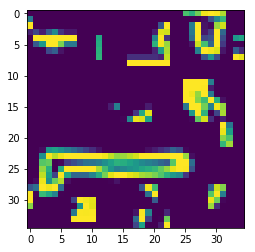

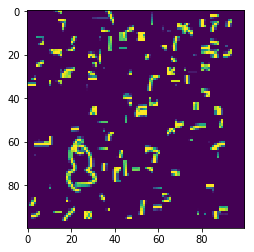

[0. 0. 0. 0.]
45 80 20 55


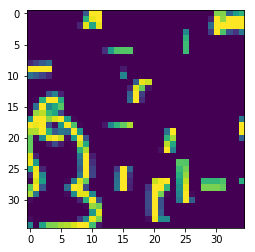

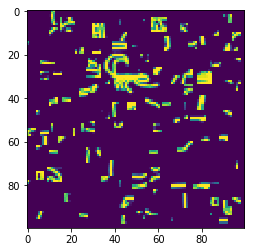

[0. 0. 0. 0.]
5 40 30 65


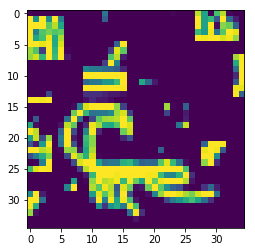

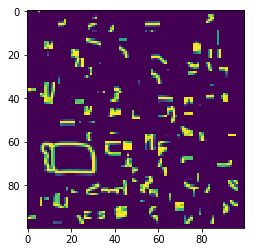

[0. 0. 0. 0.]
60 95 30 65


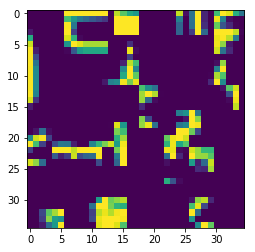

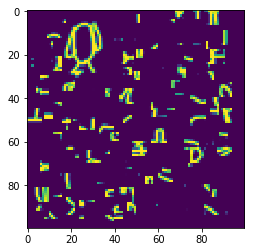

[0. 0. 0. 0.]
5 40 15 50


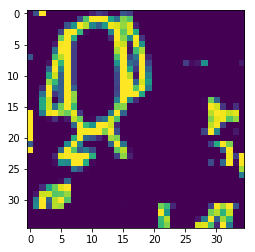

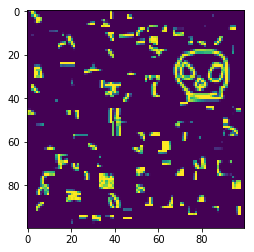

[0. 0. 0. 0.]
10 45 55 90


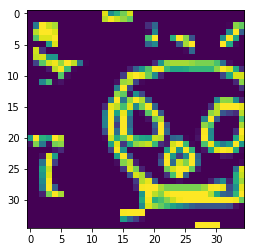

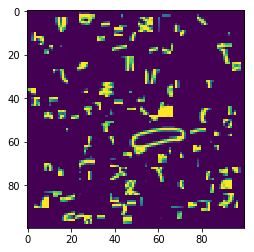

[0. 0. 0. 0.]
70 105 90 125


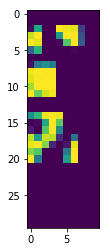

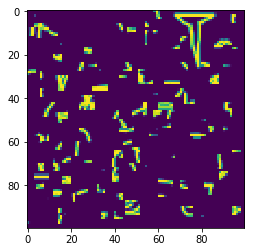

[0. 0. 0. 0.]
90 125 95 130


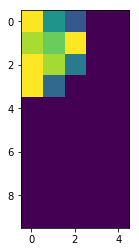

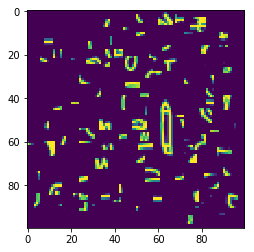

[0. 0. 0. 0.]
45 80 50 85


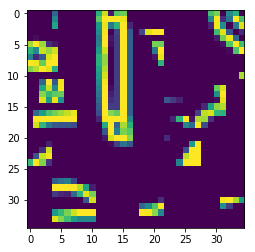

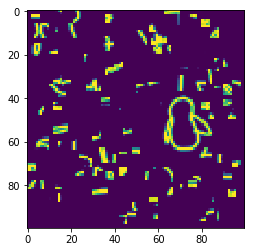

[0. 0. 0. 0.]
30 65 60 95


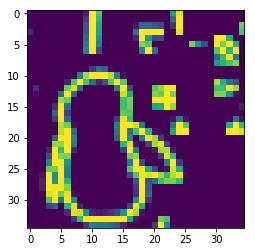

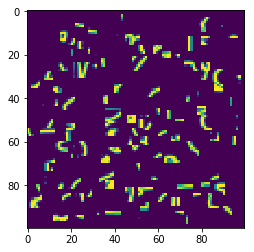

[0. 0. 0. 0.]
50 85 35 70


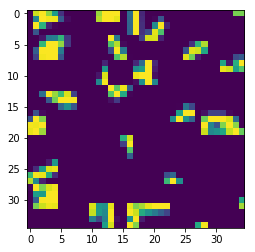

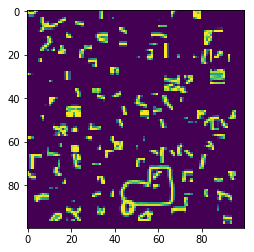

[0. 0. 0. 0.]
85 120 40 75


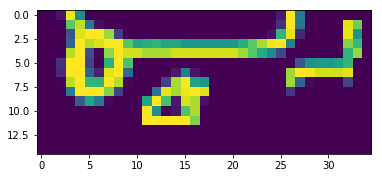

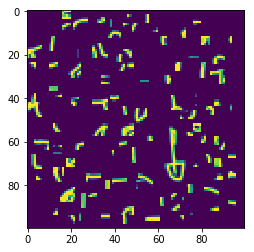

[0. 0. 0. 0.]
45 80 45 80


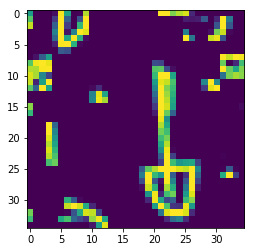

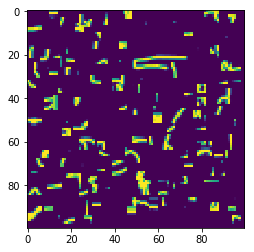

[0. 0. 0. 0.]
55 90 20 55


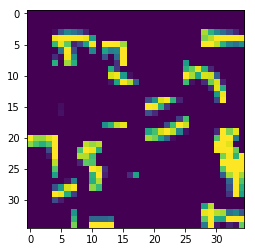

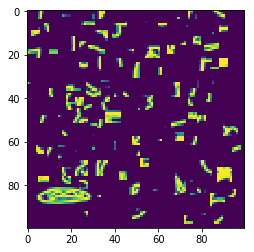

[0. 0. 0. 0.]
75 110 5 40


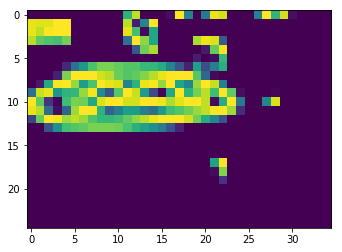

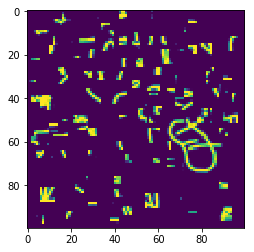

[0. 0. 0. 0.]
90 125 90 125


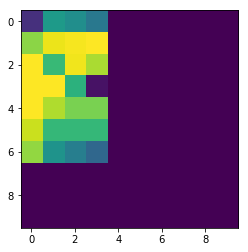

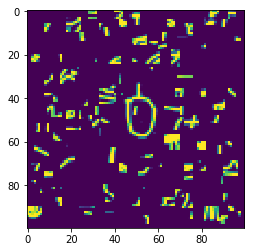

[0. 0. 0. 0.]
90 125 80 115


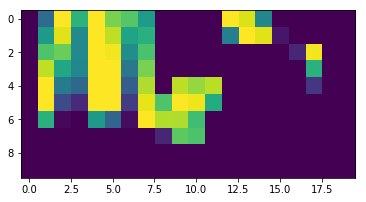

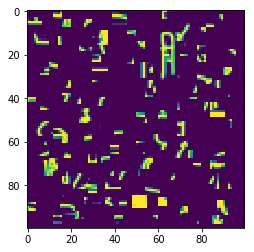

[0. 0. 0. 0.]
85 120 40 75


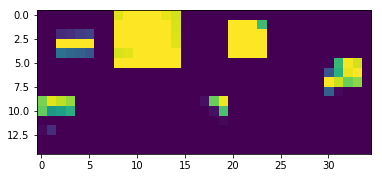

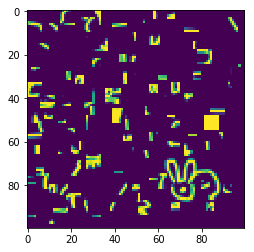

[0. 0. 0. 0.]
50 85 55 90


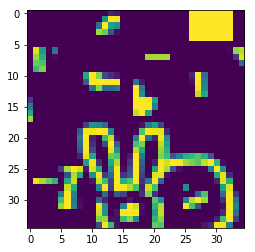

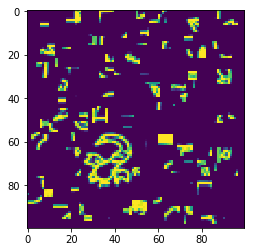

[0. 0. 0. 0.]
45 80 15 50


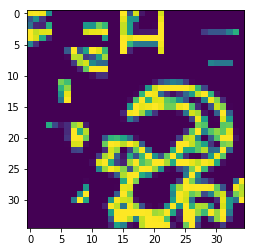

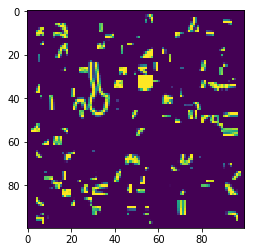

[0. 0. 0. 0.]
15 50 25 60


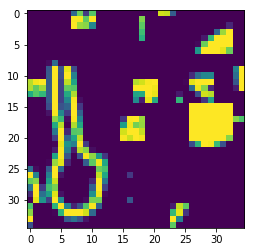

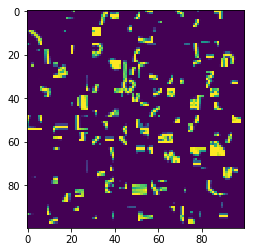

[0. 0. 0. 0.]
35 70 55 90


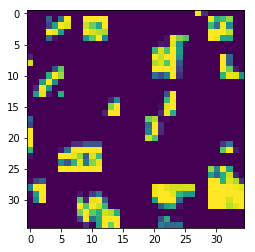

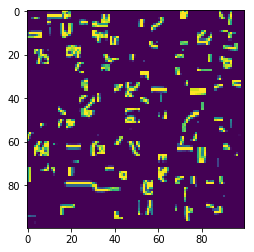

[0. 0. 0. 0.]
5 40 15 50


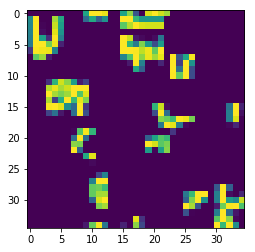

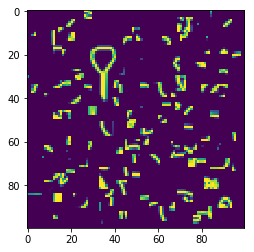

[0. 0. 0. 0.]
15 50 10 45


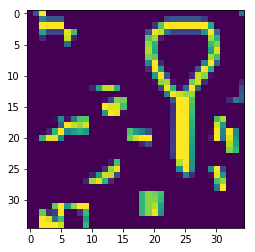

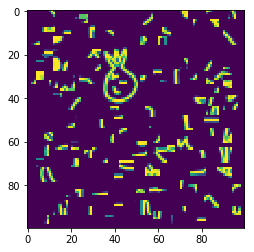

[0. 0. 0. 0.]
90 125 95 130


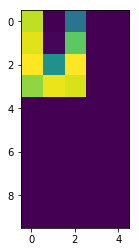

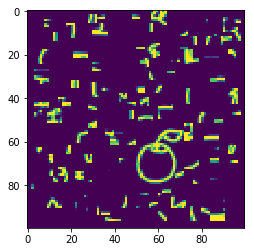

[0. 0. 0. 0.]
95 130 85 120


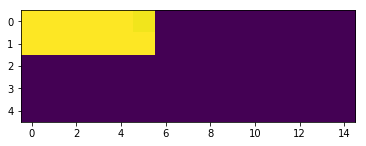

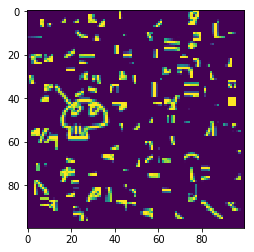

[0. 0. 0. 0.]
35 70 5 40


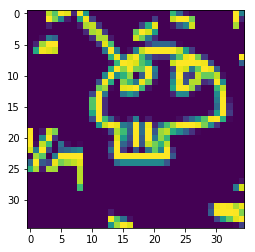

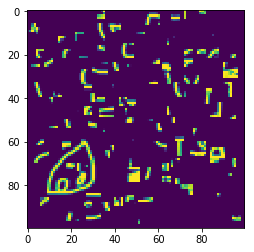

[0. 0. 0. 0.]
95 130 95 130


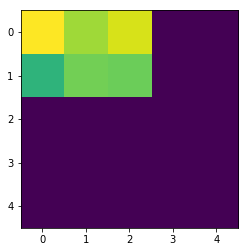

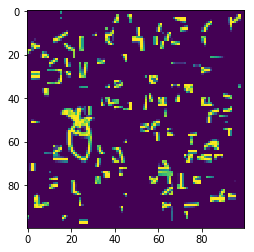

[0. 0. 0. 0.]
45 80 10 45


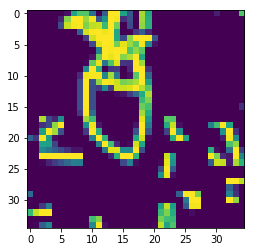

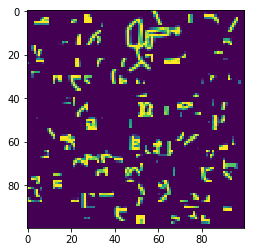

[0. 0. 0. 0.]
95 130 50 85


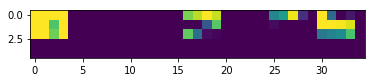

In [93]:

#Reshaping image to 100x100
#image1 = (images[0][1]).reshape(100,100)
#np.shape(image1)
#plt.imshow(image1)
#for row in image1:
#    print(row)

#for index in range(0,len(images)):
#    image = images[index][1].reshape(100,100)
#    plt.imshow(image)
#    plt.show()
#    if index > 300:
#        continue


#image = (images[0][1]).reshape(100,100)
#plt.imshow(image)
#plt.show()



#def sigmoid(x, derivative=False):
#  return x*(1-x) if derivative else 1/(1+np.exp(-x))

rows = 100
cols = 100
current_row = 0
current_col = 0
window_size = 35
step_size = 5




for index,image_row in enumerate(images):
    image = (image_row[1]).reshape(100,100)
    if index > 50:
        continue
    #print(image_row)
    #continue
    start_x = 0
    end_x = 0

    plt.imshow(image)
    plt.show()

    candidate_sum = 0
    candidate_region = np.zeros(4)
    print(candidate_region)


    while start_x < (cols - step_size):

        start_x += step_size
        end_x = start_x + window_size
        start_y = 0
        end_y = 0

        while start_y < (rows - step_size):
            start_y += step_size
            end_y = start_y + window_size
            params = image[start_x:end_x,start_y:end_y]
            # 
#            print(np.sum(params), np.var(params) / (window_size * window_size))
            calc = np.var(params) #+ np.mean(params)
#            calc = np.mean(params)
#            print(calc)
            if calc > candidate_sum:
                candidate_sum = calc
#                print(calc)
                candidate_region = [start_x,end_x,start_y,end_y]

    print(candidate_region[0],candidate_region[1],candidate_region[2],candidate_region[3])
    plt.imshow(image[candidate_region[0]:candidate_region[1],candidate_region[2]:candidate_region[3]])
    plt.show()

    